In [1]:
import numpy as np
import pandas as pd
import ssl
import matplotlib.pyplot as plt
import seaborn as sb

ssl._create_default_https_context = ssl._create_unverified_context

In [98]:
def load_data():
    data = pd.read_csv("https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/data.txt",  encoding='utf-8',sep='\t',lineterminator='\n',names=['USER','MOVIE','RATING'],header=None)
    movies = pd.read_csv("https://raw.githubusercontent.com/lakigigar/Caltech-CS155-2021/main/projects/project2/data/movies.txt", encoding='latin-1',sep='\t',header=None)
    movies.columns=['MOVIE_ID','TITLE','UNKNOWN','ACTION','ADVENTURE','ANIMATION','CHILDREN','COMEDY','CRIME','DOCUMENTARY','DRAMA','FANTASY','FILM-NOIR','HORROR','MUSICAL','MYSTERY','ROMANCE','SCI-FI','THRILLER','WAR','WESTERN']
    return data,movies

In [99]:
data,movies = load_data()

print(movies['TITLE'].unique().shape)
print(movies['MOVIE_ID'].unique().shape)

(1664,)
(1682,)


50     583
258    509
100    508
181    507
294    485
286    481
288    478
1      452
300    431
121    429
Name: MOVIE, dtype: int64
        USER                                                               \
       count        mean         std    min     25%    50%     75%    max   
MOVIE                                                                       
1      452.0  477.011062  273.652445    1.0  250.75  471.5  711.00  941.0   
2      131.0  492.007634  267.061546    1.0  277.50  484.0  732.50  943.0   
3       90.0  459.133333  257.294882    1.0  268.25  457.5  623.50  936.0   
4      209.0  469.497608  258.161624    1.0  280.00  455.0  664.00  940.0   
5       86.0  439.372093  258.042270    1.0  269.25  390.5  646.75  925.0   
...      ...         ...         ...    ...     ...    ...     ...    ...   
1678     1.0  863.000000         NaN  863.0  863.00  863.0  863.00  863.0   
1679     1.0  863.000000         NaN  863.0  863.00  863.0  863.00  863.0   
1680     1.0  863

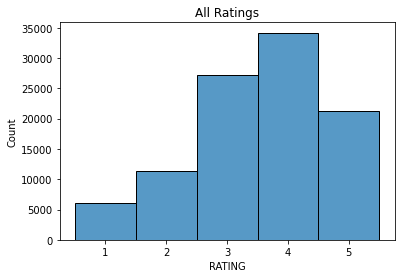

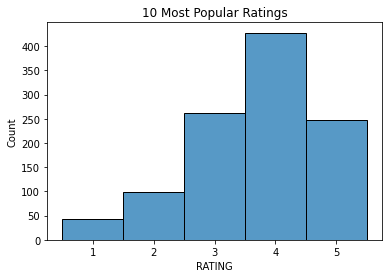

In [25]:
#Visualize all ratings
plt.figure()
sb.histplot(data['RATING'],binwidth = 1,binrange = (0.5,5.5))
plt.xticks([1,2,3,4,5])
plt.title('All Ratings')

#10 most popular movies
pop10ids = data['MOVIE'].value_counts()[:10]
print(pop10ids)
pop10 = movies.loc[movies['MOVIE_ID'].isin(pop10ind)]
pop10data = data.loc[data['MOVIE'].isin(pop10ind)]

plt.figure()
sb.histplot(pop10data['RATING'],binwidth = 1,binrange = (0.5,5.5))
plt.xticks([1,2,3,4,5])
plt.title('10 Most Popular Ratings')


In [59]:
#higest average
group_by = data.drop(columns=['USER']).groupby(by='MOVIE',group_keys=True).describe()
print(group_by)

      RATING                                             
       count      mean       std  min  25%  50%  75%  max
MOVIE                                                    
1      452.0  3.878319  0.927897  1.0  3.0  4.0  5.0  5.0
2      131.0  3.206107  0.966497  1.0  3.0  3.0  4.0  5.0
3       90.0  3.033333  1.212760  1.0  2.0  3.0  4.0  5.0
4      209.0  3.550239  0.965069  1.0  3.0  4.0  4.0  5.0
5       86.0  3.302326  0.946446  1.0  3.0  3.0  4.0  5.0
...      ...       ...       ...  ...  ...  ...  ...  ...
1678     1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
1679     1.0  3.000000       NaN  3.0  3.0  3.0  3.0  3.0
1680     1.0  2.000000       NaN  2.0  2.0  2.0  2.0  2.0
1681     1.0  3.000000       NaN  3.0  3.0  3.0  3.0  3.0
1682     1.0  3.000000       NaN  3.0  3.0  3.0  3.0  3.0

[1682 rows x 8 columns]


[408 318 169 483 114  64 603  12  50 178]
     MOVIE_ID                                              TITLE  UNKNOWN  \
10         12                         Usual Suspects, The (1995)        0   
48         50                                   Star Wars (1977)        0   
62         64                   Shawshank Redemption, The (1994)        0   
112       114  Wallace & Gromit: The Best of Aardman Animatio...        0   
167       169                         Wrong Trousers, The (1993)        0   
176       178                                12 Angry Men (1957)        0   
316       318                            Schindler's List (1993)        0   
406       408                              Close Shave, A (1995)        0   
481       483                                  Casablanca (1942)        0   
601       603                                 Rear Window (1954)        0   

     ACTION  ADVENTURE  ANIMATION  CHILDREN  COMEDY  CRIME  DOCUMENTARY  ...  \
10        0          0        

Text(0.5, 1.0, '10 Best Ratings')

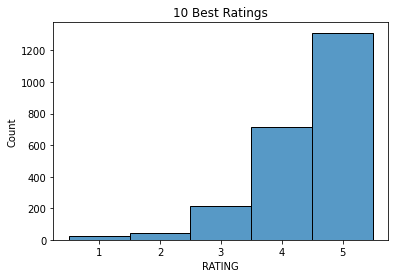

In [77]:
group_by_res = group_by['RATING']
group_by_res = group_by_res[lambda x: x['count']>=20]
group_by_res = group_by_res.sort_values(by='mean',ascending=False)
best10ids = group_by_res.index.to_numpy()
best10ids=best10ids[:10]
print(best10ids)
best10data = data.loc[data['MOVIE'].isin(best10ids)]
best10movies = movies.loc[movies['MOVIE_ID'].isin(best10ids)]
print(best10movies)

plt.figure()
sb.histplot(best10data['RATING'],binwidth = 1,binrange = (0.5,5.5))
plt.xticks([1,2,3,4,5])
plt.title('10 Best Ratings')


Text(0.5, 1.0, 'Documentary Ratings')

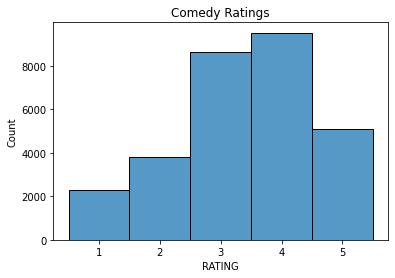

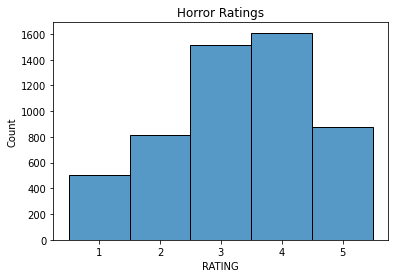

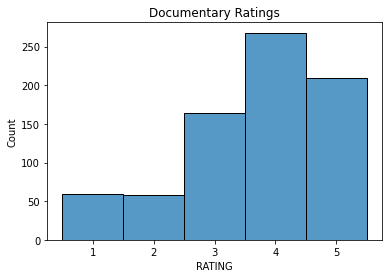

In [90]:
#COMEDY
comedy = movies[lambda x: x['COMEDY']==1]
comedy_ids = comedy['MOVIE_ID'].unique()
comedy_ids_data = data[lambda x: x['MOVIE'].isin(comedy_ids)]
plt.figure()
sb.histplot(comedy_ids_data['RATING'],binwidth = 1,binrange = (0.5,5.5))
plt.xticks([1,2,3,4,5])
plt.title('Comedy Ratings')

#HORROR
horror = movies[lambda x: x['HORROR']==1]
horror_ids = horror['MOVIE_ID'].unique()
horror_ids_data = data[lambda x: x['MOVIE'].isin(horror_ids)]
plt.figure()
sb.histplot(horror_ids_data['RATING'],binwidth = 1,binrange = (0.5,5.5))
plt.xticks([1,2,3,4,5])
plt.title('Horror Ratings')

#DOCUMENTARY
doc = movies[lambda x: x['DOCUMENTARY']==1]
doc_ids = doc['MOVIE_ID'].unique()
doc_ids_data = data[lambda x: x['MOVIE'].isin(doc_ids)]
plt.figure()
sb.histplot(doc_ids_data['RATING'],binwidth = 1,binrange = (0.5,5.5))
plt.xticks([1,2,3,4,5])
plt.title('Documentary Ratings')